# Exploratory analysis of bakery sales dataset

| Column        | Description               | Type     |
| ------------- | ------------------------- | -------- |
| -             | row index                 | Integer  |
| date          | date of sale              | Datetime |
| time          | time of sale              | Datetime |
| ticket_number | receipt number            | Integer  |
| Article       | product name              | String   |
| Quantity      | quantity of the product   | Integer  |
| UNIT_PRICE    | unit price of the product | Float    |

In [1]:
BAKERY_SALES_FILE = "./../data/bakery_sales_2021-2022.csv"

In [2]:
# load the dataset
import pandas as pd
df = pd.read_csv(BAKERY_SALES_FILE, index_col=0)
print(f"Number of records: {df.shape[0]}; number of columns: {df.shape[1]}")

Number of records: 234005; number of columns: 6


In [3]:
# peek at a few first records
df.head(5)

,date,time,ticket_number,Article,Quantity,UNIT_PRICE
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


#### Process `date` and `time` columns

In [4]:
# create a datetime column
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format="%Y-%m-%d %H:%M")

In [5]:
# add day of the week and month
df['year_month'] = df['datetime'].dt.to_period('M')
df['quarter'] = df['datetime'].dt.to_period('Q')
df['day_of_week'] = df['datetime'].dt.day_name()

In [6]:
df.head(5)

,date,time,ticket_number,Article,Quantity,UNIT_PRICE,datetime,year_month,quarter,day_of_week
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €",2021-01-02 08:38:00,2021-01,2021Q1,Saturday
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",2021-01-02 08:38:00,2021-01,2021Q1,Saturday
4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",2021-01-02 09:14:00,2021-01,2021Q1,Saturday
5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €",2021-01-02 09:14:00,2021-01,2021Q1,Saturday
8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",2021-01-02 09:25:00,2021-01,2021Q1,Saturday


In [7]:
print(f"First sale: {min(df['datetime'])}; last recorded sale: {max(df['datetime'])}")

First sale: 2021-01-02 08:38:00; last recorded sale: 2022-09-30 18:56:00


#### Process the `ticket_number` column

In [8]:
# Check for non-integer values in the 'ticket_number' column before casting it to int (potential data issue problem)
non_integer_values = df['ticket_number'].apply(lambda x: x % 1 != 0)
print(f"Number of non-integer values: {sum(non_integer_values)}")

Number of non-integer values: 0


In [9]:
# cast ticket_number column to int
df['ticket_number'] = df['ticket_number'].astype(int)

In [10]:
# check whether any ticket number is missing
sorted_ticket_numbers = sorted(df['ticket_number'].unique())
print(f"Expected number of receipts: {sorted_ticket_numbers[-1] - sorted_ticket_numbers[0]:,}")
print(f"Dataset contains {len(sorted_ticket_numbers):,} number of receipts.")

Expected number of receipts: 138,873
Dataset contains 136,451 number of receipts.


In [11]:
# Find missing receipt numbers
all_expected_receipts = set(range(sorted_ticket_numbers[0], sorted_ticket_numbers[-1]))
recorded_receipts = set(sorted_ticket_numbers)

In [12]:
missing_receipt_ids = sorted(all_expected_receipts - recorded_receipts)
print(f"There are {len(missing_receipt_ids)} missing receipts ids.")
print(missing_receipt_ids)

There are 2423 missing receipts ids.
[150047, 150057, 150226, 150446, 150482, 150533, 150541, 150545, 150593, 150595, 150597, 150695, 150724, 150743, 150751, 150752, 150872, 150897, 150950, 150972, 150974, 150979, 151008, 151015, 151018, 151040, 151182, 151205, 151208, 151395, 151675, 151720, 151742, 151750, 151754, 151792, 151793, 151815, 151903, 151927, 151928, 152017, 152046, 152049, 152054, 152060, 152092, 152361, 152363, 152425, 152427, 152490, 152519, 152528, 152544, 152546, 152566, 152571, 152682, 152684, 152709, 152820, 152843, 152844, 152964, 152983, 152991, 153102, 153108, 153161, 153296, 153386, 153421, 153424, 153438, 153440, 153457, 153466, 153571, 153574, 153594, 153701, 153702, 153718, 153719, 153751, 153832, 153835, 153836, 153844, 153856, 153857, 153867, 153912, 154017, 154057, 154070, 154109, 154148, 154149, 154183, 154185, 154274, 154286, 154308, 154435, 154437, 154461, 154462, 154564, 154579, 154580, 154581, 154615, 154739, 154744, 154878, 154970, 155088, 155101, 15

:warning: Check with the client whether identified missing receipts IDs are an error in data collection, or this is a normal behaviour.

#### Process `Article` column

In [13]:
# get number of unique articles
all_articles = sorted(df['Article'].unique())
print(f"Unique article count: {len(all_articles)}")
print(all_articles)

Unique article count: 149
['.', '12 MACARON', 'ARMORICAIN', 'ARTICLE 295', 'BAGUETTE', 'BAGUETTE APERO', 'BAGUETTE GRAINE', 'BANETTE', 'BANETTINE', 'BOISSON 33CL', 'BOTTEREAU', 'BOULE 200G', 'BOULE 400G', 'BOULE POLKA', 'BRIOCHE', 'BRIOCHE DE NOEL', 'BRIOCHETTE', 'BROWNIES', 'BUCHE 4PERS', 'BUCHE 6PERS', 'BUCHE 8PERS', 'CAFE OU EAU', 'CAKE', 'CAMPAGNE', 'CARAMEL NOIX', 'CEREAL BAGUETTE', 'CHAUSSON AUX POMMES', 'CHOCOLAT', 'CHOU CHANTILLY', 'COMPLET', 'COOKIE', 'COUPE', 'CROISSANT', 'CROISSANT AMANDES', 'CRUMBLE', 'CRUMBLECARAMEL OU PISTAE', 'DELICETROPICAL', 'DEMI BAGUETTE', 'DEMI PAIN', 'DIVERS BOISSONS', 'DIVERS BOULANGERIE', 'DIVERS CONFISERIE', 'DIVERS PATISSERIE', 'DIVERS SANDWICHS', 'DIVERS VIENNOISERIE', 'DOUCEUR D HIVER', 'ECLAIR', 'ECLAIR FRAISE PISTACHE', 'ENTREMETS', 'FICELLE', 'FINANCIER', 'FINANCIER X5', 'FLAN', 'FLAN ABRICOT', 'FONDANT CHOCOLAT', 'FORMULE PATE', 'FORMULE PLAT PREPARE', 'FORMULE SANDWICH', 'FRAISIER', 'FRAMBOISIER', 'GACHE', 'GAL FRANGIPANE 4P', 'GAL FRANG

In [14]:
# there is '.' article name - ask client what it is and why it has UNIT_PRICE of 0
df[df['Article'] == '.']

,date,time,ticket_number,Article,Quantity,UNIT_PRICE,datetime,year_month,quarter,day_of_week
33726,2021-03-04,12:32,159219,.,2.0,"0,00 €",2021-03-04 12:32:00,2021-03,2021Q1,Thursday
43541,2021-03-18,12:59,161853,.,1.0,"0,00 €",2021-03-18 12:59:00,2021-03,2021Q1,Thursday
54650,2021-04-04,09:53,164878,.,1.0,"0,00 €",2021-04-04 09:53:00,2021-04,2021Q2,Sunday
73667,2021-04-27,16:48,170079,.,1.0,"0,00 €",2021-04-27 16:48:00,2021-04,2021Q2,Tuesday
135091,2021-07-10,13:25,186662,.,2.0,"0,00 €",2021-07-10 13:25:00,2021-07,2021Q3,Saturday


#### Process `UNIT_PRICE` and `Quantity` column

In [15]:
# clean the unit price column: strip € sign and spaces, and replace ',' with a '.'
df['UNIT_PRICE'] = df['UNIT_PRICE'].replace('[\€ ]', '', regex=True).replace(',','.', regex=True).astype(float)
df['TOTAL_PRICE'] = df['Quantity'] * df['UNIT_PRICE']

In [16]:
# get sales with '0' value
df[df['TOTAL_PRICE']==0]

,date,time,ticket_number,Article,Quantity,UNIT_PRICE,datetime,year_month,quarter,day_of_week,TOTAL_PRICE
156,2021-01-02,10:51,150079,DIVERS PATISSERIE,1.0,0.0,2021-01-02 10:51:00,2021-01,2021Q1,Saturday,0.0
23009,2021-02-19,10:13,156355,DIVERS BOULANGERIE,1.0,0.0,2021-02-19 10:13:00,2021-02,2021Q1,Friday,0.0
33726,2021-03-04,12:32,159219,.,2.0,0.0,2021-03-04 12:32:00,2021-03,2021Q1,Thursday,0.0
34951,2021-03-05,18:18,159538,GD FAR BRETON,1.0,0.0,2021-03-05 18:18:00,2021-03,2021Q1,Friday,0.0
43541,2021-03-18,12:59,161853,.,1.0,0.0,2021-03-18 12:59:00,2021-03,2021Q1,Thursday,0.0
54650,2021-04-04,09:53,164878,.,1.0,0.0,2021-04-04 09:53:00,2021-04,2021Q2,Sunday,0.0
73667,2021-04-27,16:48,170079,.,1.0,0.0,2021-04-27 16:48:00,2021-04,2021Q2,Tuesday,0.0
76164,2021-05-01,10:17,170776,DIVERS PATISSERIE,1.0,0.0,2021-05-01 10:17:00,2021-05,2021Q2,Saturday,0.0
87369,2021-05-13,11:15,173793,DIVERS CONFISERIE,1.0,0.0,2021-05-13 11:15:00,2021-05,2021Q2,Thursday,0.0
135091,2021-07-10,13:25,186662,.,2.0,0.0,2021-07-10 13:25:00,2021-07,2021Q3,Saturday,0.0


In [17]:
# get number of 'refunds' (negative item quantity)
print(f"Dataset contains {len(df[df['Quantity']<0])} refunds or returns.")
df.sort_values(by='Quantity')

Dataset contains 1295 refunds or returns.


,date,time,ticket_number,Article,Quantity,UNIT_PRICE,datetime,year_month,quarter,day_of_week,TOTAL_PRICE
110378,2021-06-12,09:58,179932,CAFE OU EAU,-200.0,1.0,2021-06-12 09:58:00,2021-06,2021Q2,Saturday,-200.0
238857,2021-10-15,10:24,214565,PAIN AU CHOCOLAT,-18.0,1.2,2021-10-15 10:24:00,2021-10,2021Q4,Friday,-21.6
238856,2021-10-15,10:24,214565,CROISSANT,-17.0,1.1,2021-10-15 10:24:00,2021-10,2021Q4,Friday,-18.7
93984,2021-05-23,08:50,175484,TRADITIONAL BAGUETTE,-13.0,1.2,2021-05-23 08:50:00,2021-05,2021Q2,Sunday,-15.6
93985,2021-05-23,08:50,175484,CROISSANT,-12.0,1.1,2021-05-23 08:50:00,2021-05,2021Q2,Sunday,-13.2
...,...,...,...,...,...,...,...,...,...,...,...
241700,2021-10-19,16:43,215345,TRADITIONAL BAGUETTE,25.0,1.2,2021-10-19 16:43:00,2021-10,2021Q4,Tuesday,30.0
257472,2021-11-08,10:03,219600,BAGUETTE,43.0,0.9,2021-11-08 10:03:00,2021-11,2021Q4,Monday,38.7
434863,2022-07-23,10:26,268154,PAIN,50.0,1.3,2022-07-23 10:26:00,2022-07,2022Q3,Saturday,65.0
250844,2021-10-31,10:42,217821,TRADITIONAL BAGUETTE,55.0,1.2,2021-10-31 10:42:00,2021-10,2021Q4,Sunday,66.0


### Analyse sales volumes

In [18]:
print(f"Sales total: €{df['TOTAL_PRICE'].sum():,.2f}")

Sales total: €558,640.85


#### What is the most popular item overall

In [19]:
article_quantity_counts = df.groupby('Article')['Quantity'].sum()
article_quantity_counts.sort_values(ascending=False)

Article
TRADITIONAL BAGUETTE    117463.0
CROISSANT                29654.0
PAIN AU CHOCOLAT         25236.0
COUPE                    23505.0
BANETTE                  22732.0
                          ...   
PAIN NOIR                    1.0
ARTICLE 295                  1.0
REDUCTION SUCREES 24         1.0
DOUCEUR D HIVER              1.0
PLAT 6.50E                   0.0
Name: Quantity, Length: 149, dtype: float64

In [20]:
# get names of top 10 most sold items
popular_items = list(article_quantity_counts.sort_values(ascending=False).reset_index()['Article'][:10])
print(popular_items)

['TRADITIONAL BAGUETTE', 'CROISSANT', 'PAIN AU CHOCOLAT', 'COUPE', 'BANETTE', 'BAGUETTE', 'CEREAL BAGUETTE', 'SPECIAL BREAD', 'FORMULE SANDWICH', 'TARTELETTE']


In [21]:
items_sold_by_quarter = df.groupby(['quarter', 'Article'])['Quantity'].sum()
items_sold_by_quarter = items_sold_by_quarter.reset_index()
items_sold_by_quarter

,quarter,Article,Quantity
0,2021Q1,.,3.0
1,2021Q1,BAGUETTE,2406.0
2,2021Q1,BAGUETTE APERO,7.0
3,2021Q1,BAGUETTE GRAINE,125.0
4,2021Q1,BANETTE,2196.0
...,...,...,...
668,2022Q3,TRAITEUR,60.0
669,2022Q3,TROPEZIENNE,122.0
670,2022Q3,TROPEZIENNE FRAMBOISE,1.0
671,2022Q3,TULIPE,2.0


In [22]:
items_sold_by_month = df.groupby(['year_month', 'Article'])['Quantity'].sum()
items_sold_by_month = items_sold_by_month.reset_index()
items_sold_by_month

,year_month,Article,Quantity
0,2021-01,BAGUETTE,741.0
1,2021-01,BAGUETTE APERO,1.0
2,2021-01,BAGUETTE GRAINE,46.0
3,2021-01,BANETTE,649.0
4,2021-01,BANETTINE,113.0
...,...,...,...
1719,2022-09,TARTELETTE FRAISE,12.0
1720,2022-09,TRADITIONAL BAGUETTE,4399.0
1721,2022-09,TRAITEUR,16.0
1722,2022-09,TROPEZIENNE,14.0


In [23]:
items_sold_by_weekday = df.groupby(['day_of_week', 'Article'])['Quantity'].sum()
items_sold_by_weekday = items_sold_by_weekday.reset_index()
items_sold_by_weekday

,day_of_week,Article,Quantity
0,Friday,12 MACARON,6.0
1,Friday,BAGUETTE,2991.0
2,Friday,BAGUETTE APERO,15.0
3,Friday,BAGUETTE GRAINE,156.0
4,Friday,BANETTE,3056.0
...,...,...,...
836,Wednesday,TRIANGLES,24.0
837,Wednesday,TROPEZIENNE,46.0
838,Wednesday,TROPEZIENNE FRAMBOISE,4.0
839,Wednesday,VIENNOISE,27.0


#### Popular items sales visualisation

In [24]:
# filter only the top ten popular items that we want to visualise
popular_items_by_month = items_sold_by_month[items_sold_by_month['Article'].isin(popular_items)]
popular_items_by_month

,year_month,Article,Quantity
0,2021-01,BAGUETTE,741.0
3,2021-01,BANETTE,649.0
12,2021-01,CEREAL BAGUETTE,214.0
18,2021-01,COUPE,717.0
19,2021-01,CROISSANT,786.0
...,...,...,...
1678,2022-09,FORMULE SANDWICH,197.0
1690,2022-09,PAIN AU CHOCOLAT,928.0
1711,2022-09,SPECIAL BREAD,232.0
1717,2022-09,TARTELETTE,178.0


In [25]:
popular_items_by_month['Quantity'] = pd.to_numeric(popular_items_by_month['Quantity']).fillna(0).astype(int)

/var/folders/46/d_bqzhbx4zv_7bjkmh7612qh0000gq/T/ipykernel_39761/4056221842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_items_by_month['Quantity'] = pd.to_numeric(popular_items_by_month['Quantity']).fillna(0).astype(int)


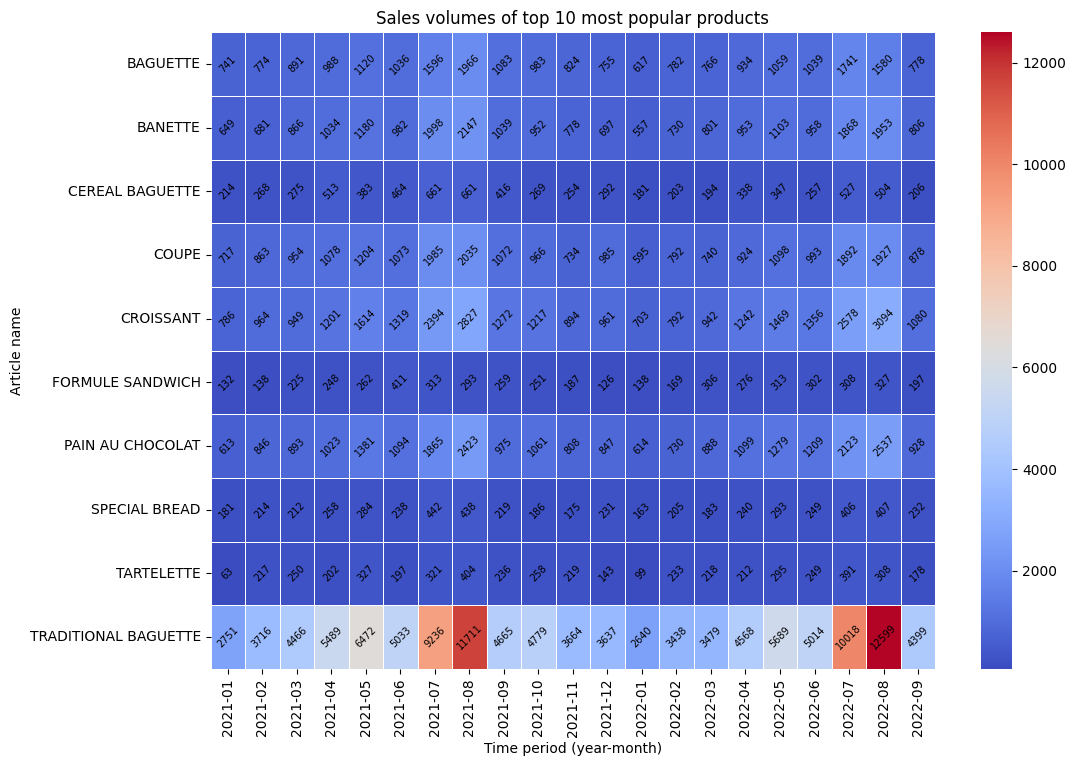

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt 

# produce heatmap that selects the top ten most popular items for each month
monthly_sales_data = popular_items_by_month.pivot_table(index='Article', columns='year_month', values='Quantity', aggfunc='sum', fill_value=0)
plt.figure(figsize=(11.69, 8.27))
# heatmap = sns.heatmap(monthly_sales_data, annot=False, cmap='YlGnBu', fmt='g', linewidths=.5, annot_kws={"size": 10})
heatmap = sns.heatmap(monthly_sales_data, annot=False, cmap='coolwarm', fmt='g', linewidths=.5, annot_kws={"size": 10})

# Display the sales numbers as diagonal numbers inside each cell
for i in range(len(monthly_sales_data)):
    for j in range(len(monthly_sales_data.columns)):
        text = monthly_sales_data.iloc[i, j]
        heatmap.text(j + 0.5, i + 0.5, f'{text}', ha='center', va='center', fontsize=7, rotation=45)

heatmap.set_xlabel("Time period (year-month)")
heatmap.set_ylabel("Article name")
plt.title('Sales volumes of top 10 most popular products')
# plt.savefig("./../figures/heatmap_top_10_sales.pdf", bbox_inches='tight')
plt.show()

In [27]:
df[['datetime', 'ticket_number', 'Article', 'Quantity', 'UNIT_PRICE', 'TOTAL_PRICE']].describe()

,datetime,ticket_number,Quantity,UNIT_PRICE,TOTAL_PRICE
count,234005,234005.000000,234005.000000,234005.000000,234005.000000
mean,2021-11-30 23:07:31.923163904,219201.258738,1.538377,1.662195,2.387303
min,2021-01-02 08:38:00,150040.000000,-200.000000,0.000000,-200.000000
25%,2021-07-03 11:21:00,184754.000000,1.000000,1.100000,1.200000
50%,2021-11-04 11:56:00,218807.000000,1.000000,1.200000,1.600000
75%,2022-05-31 09:18:00,253927.000000,2.000000,1.500000,2.600000
max,2022-09-30 18:56:00,288913.000000,200.000000,60.000000,200.000000
std,NaN,40053.223896,1.289603,1.722720,2.635041


In [28]:
# profile the dataset
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import warnings

# silence Future and User warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn.matrix")
warnings.filterwarnings("ignore", category=UserWarning, module="ydata_profiling.model.missing")

profile = ProfileReport(df[['datetime', 'ticket_number', 'Article', 'Quantity', 'UNIT_PRICE', 'TOTAL_PRICE']], title="Bakery sales")
profile.to_widgets()

/Users/peter/Documents/osobne/peter/praca/dalej/NICD_Senior_Data_Scientist_jan_24/assessment/preassesment-task/.venv/lib/python3.10/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Save the cleaned dataset

In [29]:
df.to_csv('../data/bakery_sales_cleaned.csv', index=False)
df.to_excel('../data/bakery_sales_cleaned.xlsx', index=False)